In [1]:
import numpy
import py_entropy
from matplotlib import pyplot

# Diffusion

Here we setup an $n=50$ site system with open boundaries. We then run for 1000 alternating layers and plot the occupancy probability distribution $\mathbb{P}_i$ with darker shading indicating later time steps. Red is the very last state.

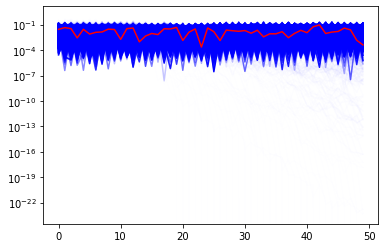

In [2]:
# Make an initial state
n = 50
s = py_entropy.SingleDefectState(numpy.asarray([1.0] + [0]*(n-1), dtype="complex128"))

k = 10000
for i in range(k):
    _, state = s.get_state()
    pyplot.plot(abs(state[0,0,:])**2,c='b',alpha=(i+1)/k)
    s.apply_layer(i%2 == 1, periodic_boundaries=False)
_, state = s.get_state()
pyplot.plot(abs(state[0,0,:])**2,c='r')

pyplot.yscale('log')
pyplot.show()

# Unitarity

Lets check that everything is unitary, sum the total error of $\langle \psi \vert \psi \rangle^2 - 1$

In [3]:
%%time

s = py_entropy.SingleDefectState(numpy.asarray([1.0] + [0]*(n-1), dtype="complex128"), num_experiments=10000)
s.apply_alternative_layers(k, periodic_boundaries=False)
_, state = s.get_state()
state = state[:,0,:]
print("Total unitarity error: {}".format(sum(abs((abs(state)**2).sum(axis=1) - 1))))

Total unitarity error: 3.380551394371878e-11
CPU times: user 13min, sys: 7.6 s, total: 13min 8s
Wall time: 33.4 s


# Purity

Now we look at the state purity over time:
$$F_k = \sum_s \vert \langle s \vert \psi_k \rangle \vert^4 - \frac{2}{D}\sum_{s'>s} \vert \langle s' \vert \psi_k \rangle \vert^2 \vert \langle s \vert \psi_k \rangle \vert^2$$

With $k$ the layer depth, we plot this over $k$ for a single run.

1.0


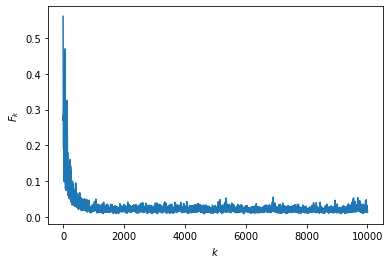

In [4]:
s = py_entropy.SingleDefectState(numpy.asarray([1.0] + [0]*(n-1), dtype="complex128"))
print(s.get_mean_purity())
purities = s.apply_alternative_layers_and_save_mean_purity(k, periodic_boundaries=False)

pyplot.plot(purities)
pyplot.xlabel('$k$')
pyplot.ylabel('$F_k$')
pyplot.show()

Now lets average the purity over $10,000$ samples with $n=50$ and $k=10000$

In [5]:
%%time

s = py_entropy.SingleDefectState(numpy.asarray([1.0] + [0]*49, dtype="complex128"), num_experiments=10000)
purities = s.apply_alternative_layers_and_save_mean_purity(k, periodic_boundaries=False)

CPU times: user 14min 55s, sys: 8.74 s, total: 15min 4s
Wall time: 38.2 s


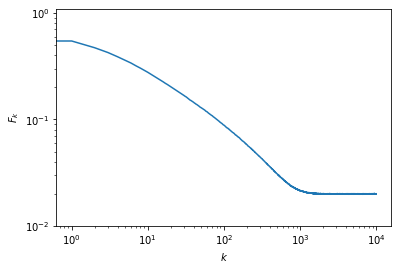

In [6]:
pyplot.plot(purities)
pyplot.xlabel('$k$')
pyplot.ylabel('$F_k$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylim([1e-2,1.1])
pyplot.show()

## Mixed States

Start with $\rho = \frac{1}{2} \vert 0 \rangle \langle 0 \vert + \frac{1}{2} \vert D \rangle \langle D \vert$

We expect $F = \left(\frac{1}{2}\right)^2 + \left(\frac{1}{2}\right)^2 - \frac{2}{D}\left(\frac{1}{2}\right)\left(\frac{1}{2}\right) = \frac{1}{2} - \frac{1}{2D}$

In [7]:
N = 50
state_a = numpy.array([1] + [0]*(N-1), dtype=numpy.complex128)
state_b = numpy.array([0]*(N-1) + [1], dtype=numpy.complex128)

mixed_state = py_entropy.SingleDefectState.new_mixed([(0.5, state_a), (0.5, state_b)])
mixed_state.get_mean_purity()

0.49

In [8]:
N = 100
state_a = numpy.array([1] + [0]*(N-1), dtype=numpy.complex128)
state_b = numpy.array([0]*(N-1) + [1], dtype=numpy.complex128)

mixed_state = py_entropy.SingleDefectState.new_mixed([(0.5, state_a), (0.5, state_b)])
mixed_state.get_mean_purity()

0.495

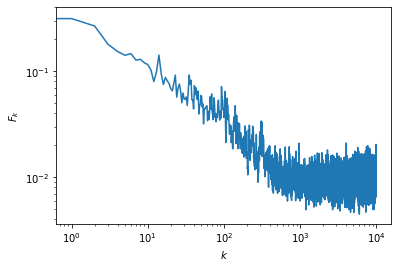

In [9]:
N = 50
state_a = numpy.array([1] + [0]*(N-1), dtype=numpy.complex128)
state_b = numpy.array([0]*(N-1) + [1], dtype=numpy.complex128)

mixed_state = py_entropy.SingleDefectState.new_mixed([(0.5, state_a), (0.5, state_b)])
purities = mixed_state.apply_alternative_layers_and_save_mean_purity(k, periodic_boundaries=False)

pyplot.plot(purities)
pyplot.xlabel('$k$')
pyplot.ylabel('$F_k$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.show()

In [10]:
N = 50

state = numpy.array([1] + [0]*(N-2) + [1], dtype=numpy.complex128) / numpy.sqrt(2)
pure_state = py_entropy.SingleDefectState(state, num_experiments=10000)
pure_purities = pure_state.apply_alternative_layers_and_save_mean_purity(k, periodic_boundaries=False)

state_a = numpy.array([1] + [0]*(N-1), dtype=numpy.complex128)
state_b = numpy.array([0]*(N-1) + [1], dtype=numpy.complex128)

mixed_state = py_entropy.SingleDefectState.new_mixed([(0.5, state_a), (0.5, state_b)], num_experiments=10000)
mixed_purities = mixed_state.apply_alternative_layers_and_save_mean_purity(k, periodic_boundaries=False)

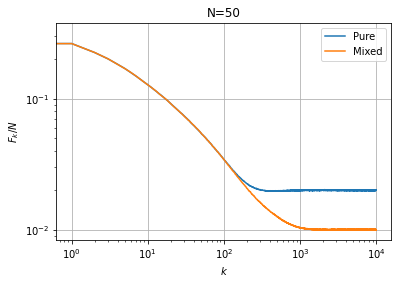

In [11]:
pyplot.plot(pure_purities, label='Pure')
pyplot.plot(mixed_purities, label='Mixed')
pyplot.xlabel('$k$')
pyplot.ylabel('$F_k/N$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.title('N=50')
pyplot.legend()
pyplot.grid()
pyplot.savefig('split.jpg')
pyplot.show()

## Multidefect

In [3]:
s = py_entropy.MultiDefectState([[0,1]], numpy.array([1.0], dtype=numpy.complex128), 4, 2)

In [4]:
_, states = s.get_state()
states

array([[[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]]])

In [14]:
s = py_entropy.MultiDefectState([[0,9]], numpy.array([1.0], dtype=numpy.complex128), 10, 2, num_experiments=1)

mags = []
maxs = []
mins = []

s.apply_layer(True)
_, states = s.get_state()
enum_states = s.get_enumerated_states()

for sa, sb in zip(enum_states, states[0,0,:]):
    print(sa, abs(sb)**2)

[0, 1] 0.0
[0, 2] 0.0
[0, 3] 0.0
[0, 4] 0.0
[0, 5] 0.0
[0, 6] 0.0
[0, 7] 0.0
[0, 8] 0.0
[0, 9] 1.0
[1, 2] 0.0
[1, 3] 0.0
[1, 4] 0.0
[1, 5] 0.0
[1, 6] 0.0
[1, 7] 0.0
[1, 8] 0.0
[1, 9] 0.0
[2, 3] 0.0
[2, 4] 0.0
[2, 5] 0.0
[2, 6] 0.0
[2, 7] 0.0
[2, 8] 0.0
[2, 9] 0.0
[3, 4] 0.0
[3, 5] 0.0
[3, 6] 0.0
[3, 7] 0.0
[3, 8] 0.0
[3, 9] 0.0
[4, 5] 0.0
[4, 6] 0.0
[4, 7] 0.0
[4, 8] 0.0
[4, 9] 0.0
[5, 6] 0.0
[5, 7] 0.0
[5, 8] 0.0
[5, 9] 0.0
[6, 7] 0.0
[6, 8] 0.0
[6, 9] 0.0
[7, 8] 0.0
[7, 9] 0.0
[8, 9] 0.0


In [15]:
%%time
s = py_entropy.MultiDefectState([[0,1,2]], numpy.array([1.0], dtype=numpy.complex128), 20, 3, num_experiments=1000)

s.apply_alternative_layers(1000)
_, state = s.get_state()
state = state[:,0,:]
print("Total unitarity error: {}".format(sum(abs((abs(state)**2).sum(axis=1) - 1))))

Total unitarity error: 2.5738300379885004e-12
CPU times: user 18.2 s, sys: 215 ms, total: 18.4 s
Wall time: 808 ms


1.0


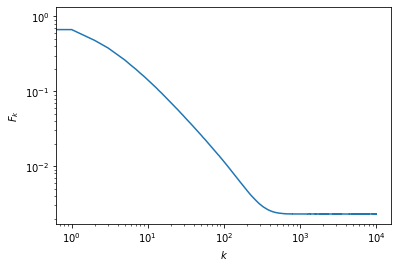

In [16]:
k = 10000
s = py_entropy.MultiDefectState([[0,1]], numpy.array([1.0], dtype=numpy.complex128), 30, 2, num_experiments=10000)
print(s.get_mean_purity())
purities = s.apply_alternative_layers_and_save_mean_purity(k)

pyplot.plot(purities)
pyplot.xlabel('$k$')
pyplot.ylabel('$F_k$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.show()